In [3]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

In [31]:
qsos = pd.read_csv('qso_full_sample.csv', header=1)
qsos

,specobjid,plate,mjd,fiberID,subclass,z,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,nii_6584_flux,nii_6584_flux_err,w1,w2,w3
0,488650761677334528,434,51885,37,STARFORMING,0.031806,179.18290,3.725311,532.27030,4.979182,120.87770,2.950646,375.71750,4.320990,12.914,12.855,9.814
1,1875771560090953728,1666,52991,81,STARBURST,0.052054,110.69790,4.200375,2933.44400,16.132480,658.78970,6.298617,1293.39600,8.086383,12.672,12.444,8.344
2,621633396317120512,552,51992,497,STARFORMING,0.028640,70.05690,2.962384,923.47490,6.917922,236.42910,3.474313,402.55940,4.552309,11.824,11.737,7.972
3,1351143154891384832,1200,52668,230,BROADLINE,0.041351,77.65710,6.420899,293.41920,8.827817,60.99540,5.441838,296.32160,8.994952,11.575,11.561,8.932
4,1961444682533726208,1742,53053,462,STARBURST,0.022788,360.22980,8.372718,4102.18400,32.123670,1132.09900,13.571160,1350.74300,13.259370,12.456,12.306,8.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1880254570081314816,1670,54553,6,AGN,0.006713,237.64950,10.084890,1606.07000,21.818100,252.30570,8.738088,1717.96300,21.619340,10.134,10.084,7.426
967,1554946988011710464,1381,53089,288,AGN BROADLINE,0.010606,316.44710,13.377860,321.03310,15.835350,105.31720,9.790290,328.14980,16.191970,11.087,11.156,9.601
968,2443294946959058944,2170,53875,335,NaN,0.013753,162.28240,13.809900,192.57040,17.452480,73.72364,11.431460,206.22470,18.082580,10.547,10.638,9.822
969,635153819818289152,564,52224,532,BROADLINE,0.072904,44.26082,3.619859,86.23957,3.425123,23.61263,2.641708,116.88400,3.820231,13.307,13.223,12.548


In [6]:
qsos.shape

(960, 17)

In [7]:
qsos.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'subclass', 'z',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'w1', 'w2', 'w3'],
      dtype='object')

In [8]:
Counter(qsos['subclass'])

Counter({'STARBURST': 153,
         'BROADLINE': 317,
         nan: 94,
         'STARFORMING': 213,
         'STARFORMING BROADLINE': 29,
         'AGN BROADLINE': 69,
         'AGN': 84,
         'STARBURST BROADLINE': 1})

Here, I'll plot the distribution of the fluxes to get an idea of the data.

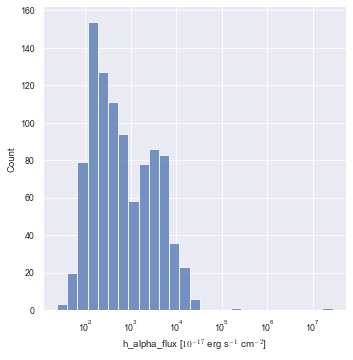

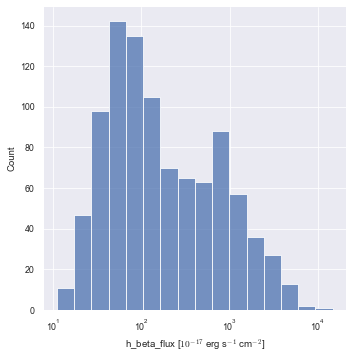

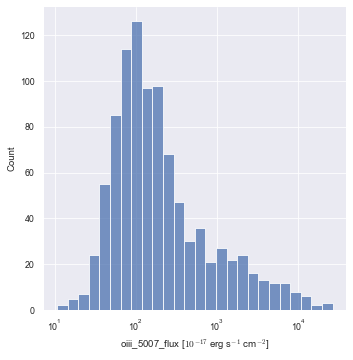

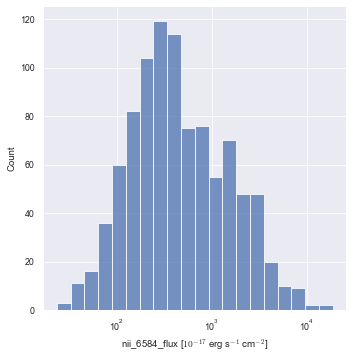

In [17]:
cols = ['h_alpha_flux', 'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux']

for col in cols:
    sns.displot(data=qsos, x=col, log_scale=True)

    plt.xlabel(col + r' [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$]')

    # plt.savefig('distr_' + col + '.pdf')

    plt.show()

# BPT Diagram

In [11]:
qsos['nii_h_alpha'] = qsos.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
qsos['oiii_h_beta'] = qsos.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)

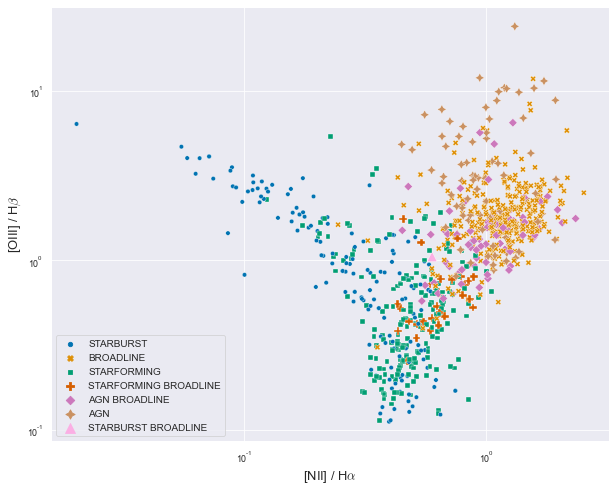

In [14]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind', 
                hue='subclass', style='subclass', size='subclass', sizes=(100, 20))

plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('BPT_diagram_sdss_subclasses.pdf')

plt.show()

## BPT Diagram with Theoretical Lines

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


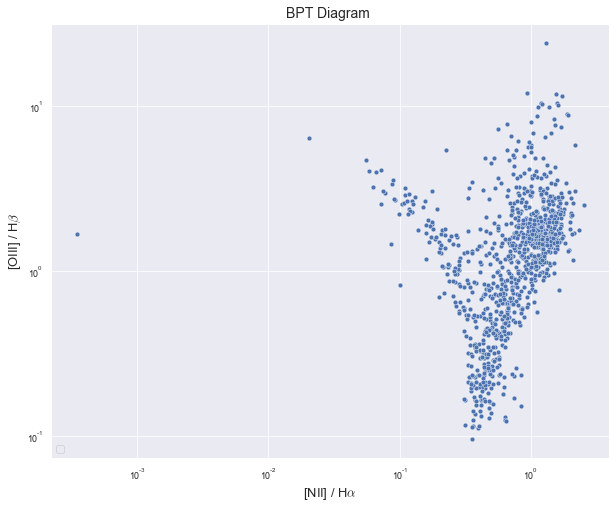

In [30]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind'
                #hue='subclass', style='subclass', size='subclass', sizes=(100, 20)
                )

plt.title('BPT Diagram ', fontsize=14)
plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('BPT_.pdf')

plt.show()

# Mid-IR WISE Colours

In [32]:
def wise_color_color(w1, w2, w3):
    '''
    Returns the class according to Figure 11b in Jarret et al. 2017
    '''
    color_x = w2 - w3
    color_y = w1 - w2

    if color_y >= 1.8:
        return 'AGN & (u)LIRGs'
    elif color_y < 1.8 and color_x < 2.0:
        return 'Spheroids'
    elif color_y < 1.8 and color_x > 3.5:
        return 'SF Disks'
    else:
        return 'Inter. Disks'

In [35]:
qsos['wise class'] = qsos.apply(lambda x: wise_color_color(x['w1'], x['w2'], x['w3']), axis=1)
Counter(qsos['wise class'])

Counter({'Inter. Disks': 290, 'SF Disks': 267, 'Spheroids': 414})

In [36]:
qsos['w1-w2'] = qsos.apply(lambda x: x['w1'] - x['w2'], axis=1)
qsos['w2-w3'] = qsos.apply(lambda x: x['w2'] - x['w3'], axis=1)

## 

## Plotting Color-Color

In [64]:
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


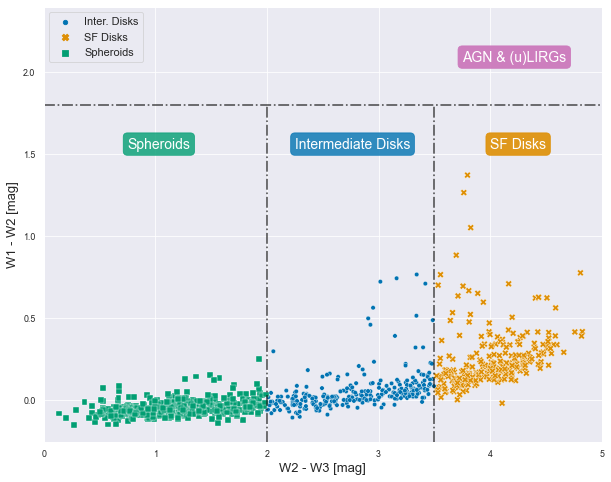

In [98]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.ylim(qsos['w1-w2'].min()-0.1, 2.4)
plt.xlim(0, 5)

sns.scatterplot(data=qsos, x='w2-w3', y='w1-w2', palette='colorblind', 
                hue='wise class', style='wise class', size='wise class', sizes=(70, 20))

plt.vlines([2.0, 3.5], qsos['w1-w2'].min()-0.1, 1.8, linestyles='dashdot', color='k', alpha=0.7, linewidth=1.7)
plt.hlines(1.8, 0, 5, linestyles='dashdot', color='k', alpha=0.7, linewidth=1.7)

props = dict(boxstyle='round', color='#cc78bc', alpha=0.95)
ax.text(0.75, 0.9, 'AGN & (u)LIRGs', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props, color='white')

props_1 = dict(boxstyle='round', color='#0173b2', alpha=0.8)
ax.text(0.45, 0.7, 'Intermediate Disks', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_1, color='white')

props_2 = dict(boxstyle='round', color='#029e73', alpha=0.8)
ax.text(0.15, 0.7, 'Spheroids', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_2, color='white')

props_3 = dict(boxstyle='round', color='#de8f05', alpha=0.9)
ax.text(0.8, 0.7, 'SF Disks', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props_3, color='white')

plt.xlabel(r'W2 - W3 [mag]', fontsize=13)
plt.ylabel(r'W1 - W2 [mag]', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

# plt.savefig('wise_color_color.pdf')

plt.show()